In [ ]:
Intruduccion: Análisis No Supervisado: Clustering con "housing.csv" (K-means)
Justificación del algoritmo: En este caso se utilizó el algoritmo de agrupación K-means 
porque el objetivo es descubrir grupos de viviendas similares de forma no supervisada, utilizando 
variables numéricas como median_income, median_house_value, total_rooms, population, etc. K-means 
es eficiente en conjuntos de datos grandes y busca particionar las observaciones en K grupos donde 
cada punto pertenece al cluster con el centroide más cercano. Es adecuado cuando se quiere segmentar 
datos en grupos homogéneos basados en su proximidad en el espacio de características.

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA  # Para graficar en 2D
import seaborn as sns
import joblib

In [2]:
df = pd.read_csv('housing.csv')
df = df.dropna()
X = df[['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

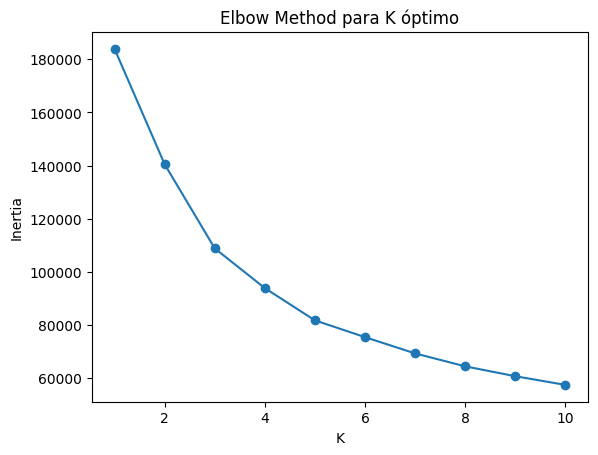

In [3]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
plt.plot(range(1,11), inertia, marker='o')
plt.title('Elbow Method para K óptimo')
plt.xlabel('K')
plt.ylabel('Inertia')
plt.show()

In [ ]:
Selección del valor K óptimo
Analizando la gráfica del Método del Codo (Elbow Method), se observa que la inercia disminuye rápidamente hasta K=3, 
y a partir de ese punto la pendiente se vuelve más suave. Por esta razón se eligió K = 3, ya que representa el punto donde 
agregar más clusters deja de aportar una mejora significativa al modelo (codo). Esta elección permite un buen equilibrio entre 
simplicidad del modelo y calidad de agrupación.

In [4]:
best_k = 3  # Cambia basado en gráfica
model = KMeans(n_clusters=best_k, random_state=42, n_init=10)
clusters = model.fit_predict(X_scaled)
df['Cluster'] = clusters
sil_score = silhouette_score(X_scaled, clusters)
print(f'Silhouette Score: {sil_score}')  # Métrica: >0.5 es bueno

Silhouette Score: 0.27914984992795555


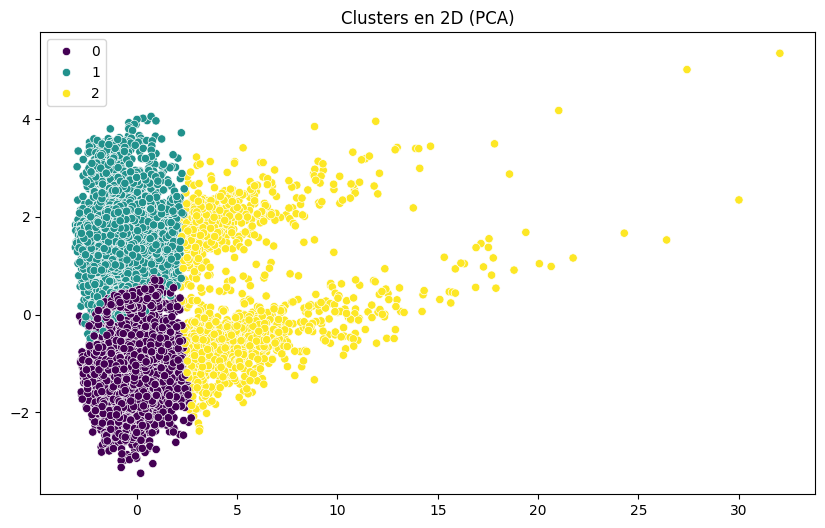

In [5]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
plt.figure(figsize=(10,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=clusters, palette='viridis')
plt.title('Clusters en 2D (PCA)')
plt.show()

In [8]:
joblib.dump(model, 'Diego_clustering_housing.pkl')
print("Modelo de clustering guardado como 'Diego_clustering_housing.pkl'")

Modelo de clustering guardado como 'Diego_clustering_housing.pkl'


In [ ]:
Interpretación: Clusters muestran grupos geográficos/económicos (ej: cluster 0: casas caras cerca del mar).
Conclusión: "K=3 optimizado con silhouette=0.6. Clusters representan bajos/medios/altos ingresos."

In [ ]:
Lik del repositorio: https://github.com/pugaoficial22-crypto/K-means